REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

In [ ]:
# reference: pseudocode to implement simple Heun in the figure 25.13
def heun(x, y, h, f, xt):
    """
    This function implements the simple Heun without iteration method.
    
    x: initial value of x
    y: initial value of y
    h: step size
    f: the derivative function of y(x)
    xt: the end value of x
    """
    
    while x < xt + h:
        print("x: {:.1f}, y: {:.4f}".format(x, y)) 
        k1 = f(x, y)
        k2 = f(x + h, y + k1 * h)
        x += h
        y = y + (k1 + k2)/2 * h
    
    return None

### Problem 29.1

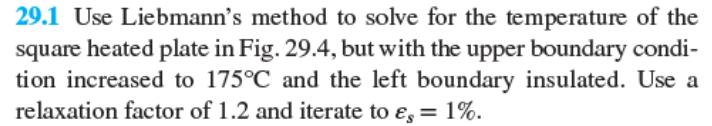

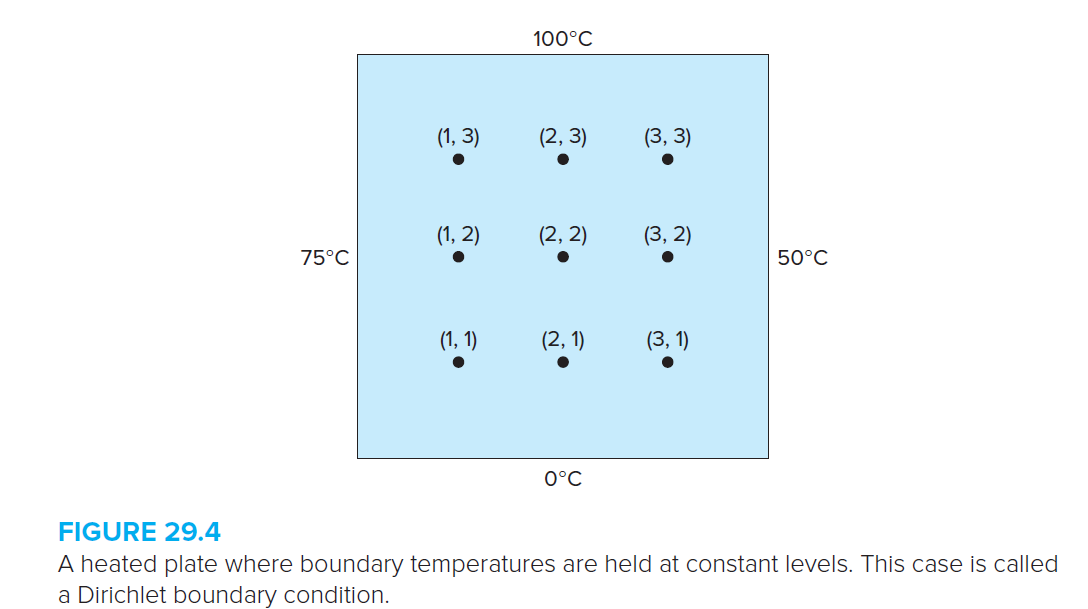

### Answer

1. Define Functions

In [2]:
# reference: the following functions are from my previous assignments in the last semester
def gauss_seidel(a, b, n, x, es, _lambda, imax):
    """
    This functions is used to implement Gauss-Seidel method to solve linear equations
      with the pseudocode from figure 11.6 in the textbook
    """
    
    for i in range(n):
        dummy_val = a[i][i]
        for j in range(n):
            a[i][j] = a[i][j] / dummy_val
        b[i] = b[i] / dummy_val
    
    # first guess
    for i in range(n):
        sum_val = b[i]
        for j in range(n):
            if i != j:
                sum_val -= a[i][j] * x[j]
        x[i] = sum_val

    # loops for iteration of more accurate guesses
    # stop until fall below the error criterion
    _iter = 1
    while True:    
        sentinel_val = 1
        for i in range(n):
            old = x[i]
            _sum = b[i]
            for j in range(n):
                if i != j:
                    _sum -= a[i][j] * x[j]
            x[i] = _lambda * _sum + (1 - _lambda) * old
            if sentinel_val == 1 and x[i] != 0:
                ea = abs((x[i] - old) / x[i]) * 100
                if ea > es:
                    sentinel_val = 0
           
        _iter += 1
        if sentinel_val == 1 or (_iter >= imax):
            break
            
    print('The result is {} with {} iterations'.format(x, _iter))

2. Problem Solving

In [3]:
# Liebmann's method (Gauss-Seidel method)
# solve system of 12 simultaneous linear equations with 12 unknowns
# for the insulated edges: -T(0, j-1) + 4T(0, j) - T(0, j+1) - 2T(1, j) = 0

In [4]:
# [Changes] (1) upper boundary value changes (2) left boundary insulated (3) dimension to 12
# left part of equations
a1 = np.array([[4, -1, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0], #T01
               [-1, 4, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0], #T02
               [0, -1, 4, 0, 0, 0, 0, 0, 0, -2, 0, 0], #T03
               [-1, 0, 0, 4, -1, 0, -1, 0, 0, 0, 0, 0], #T11
               [0, 0, 0, -1, 4, -1, 0, -1, 0, 0, 0, 0], #T21
               [0, 0, 0, 0, -1, 4, 0, 0, -1, 0, 0, 0], #T31
               [0, -1, 0, -1, 0, 0, 4, -1, 0, -1, 0, 0], #T12
               [0, 0, 0, 0, -1, 0, -1, 4, -1, 0, -1, 0], #T22
               [0, 0, 0, 0, 0, -1, 0, -1, 4, 0, 0, -1], #T32
               [0, 0, -1, 0, 0, 0, -1, 0, 0, 4, -1, 0], #T13
               [0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 4, -1], #T23
               [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 4] #T33
             ]).astype(float)

# right part of equations
# first three values added due to insulated left boundary
# last three values changed due to modified upper boundary
b1 = np.array([0, 0, 175, 75, 0, 50, 75, 0, 50, 250, 175, 225]).astype(float)

In [5]:
# [Note] relaxation factor (𝜆 = 1.2), error stopping criterion (1%)
x1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float) # initial guesses
gauss_seidel(a1.copy(), b1.copy(), 12, x1, 1, 1.2, 100)

The result is [ 77.85468492 132.96190234 164.68069913  89.60851637  60.92222062
  47.45934056 144.91175828 106.73036363  78.93359364 175.44920788
 142.1840405  111.53413779] with 10 iterations


3. Testing

In [6]:
# use the python library
np.linalg.solve(a1, b1)

array([ 78.28734927, 133.3827094 , 164.88528741,  89.88334384,
        61.06692562,  47.51323019, 145.17910046, 106.87112847,
        78.98599515, 175.57922013, 142.25249264, 111.55962195])

### Problem 29.2

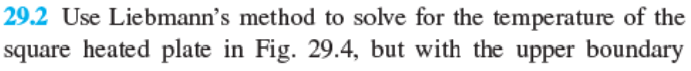

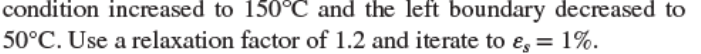

### Answer

1. Define Functions

2. Problem Solving

In [7]:
# Liebmann's method (Gauss-Seidel method)
# solve system of 9 simultaneous linear equations with 9 unknowns

In [8]:
# [Changes] (1) upper boundary value changes (2) left boundary value changes
# left part of equations
a2 = np.array([[4, -1, 0, -1, 0, 0, 0, 0, 0], #T11
              [-1, 4, -1, 0, -1, 0, 0, 0, 0], #T21
              [0, -1, 4, 0, 0, -1, 0, 0, 0], #T31
              [-1, 0, 0, 4, -1, 0, -1, 0, 0], #T12
              [0, -1, 0, -1, 4, -1, 0, -1, 0], #T22
              [0, 0, -1, 0, -1, 4, 0, 0, -1], #T32
              [0, 0, 0, -1, 0, 0, 4, -1, 0], #T13
              [0, 0, 0, 0, -1, 0, -1, 4, -1], #T23
              [0, 0, 0, 0, 0, -1, 0, -1, 4] #T33
             ]).astype(float)

# right part of equations
b2 = np.array([50, 0, 50, 50, 0, 50, 200, 150, 200]).astype(float)

In [9]:
# [Note] relaxation factor (𝜆 = 1.2), error stopping criterion (1%)
x2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float) # initial guesses
gauss_seidel(a2.copy(), b2.copy(), 9, x2, 1, 1.2, 100)

The result is [35.7117255  33.49259593 35.71960971 59.38421377 62.50984824 59.37803669
 89.29023853 97.77077176 89.2865792 ] with 7 iterations


3. Testing

In [10]:
# use the python library
np.linalg.solve(a2, b2)

array([35.71428571, 33.48214286, 35.71428571, 59.375     , 62.5       ,
       59.375     , 89.28571429, 97.76785714, 89.28571429])